CLIMATE CHANGES MODELING

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB
None
                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb

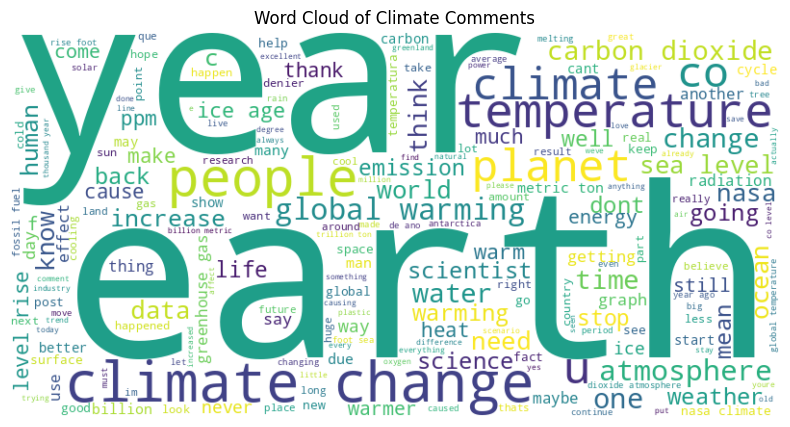

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load your dataset
file_path = '/content/climate_nasa.csv'  # <-- update this if needed
df = pd.read_csv(file_path)

# Display basic info
print("Before Cleaning:")
print(df.info())
print(df.head())

# Handle missing values
df['commentsCount'] = df['commentsCount'].fillna(0)
df['likesCount'] = df['likesCount'].fillna(0)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# Handle any text-related missing values
df['text'] = df['text'].fillna('')

# Display after cleaning
print("After Cleaning:")
print(df.info())
print(df.head())

# Basic descriptive statistics
print(df.describe())

# -------------------------------------
# TEXT PREPROCESSING FUNCTION
# -------------------------------------

# Initialize stopwords & lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters, numbers, URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords & lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

# Apply cleaning to text column
df['clean_text'] = df['text'].apply(clean_text)

# Display few cleaned texts
print(df[['text', 'clean_text']].head())

# -------------------------------------
# WORD CLOUD (Visualization)
# -------------------------------------
all_words = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Climate Comments')
plt.show()


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
!pip install vaderSentiment

                                                text  \
0  Neat comparison I have not heard it before.\n ...   
1  An excellent way to visualise the invisible! T...   
2  Does the CO2/ghg in the troposphere affect the...   
3  excellent post! I defo feel the difference - o...   
4  Yes, and carbon dioxide does not harm the Eart...   

                                          clean_text  sentiment_score  \
0  neat comparison heard would say co like disco ...           0.7430   
1           excellent way visualise invisible thanks           0.7650   
2  coghg troposphere affect stratosphere warmer t...           0.2960   
3  excellent post defo feel difference one drink ...           0.1027   
4  yes carbon dioxide harm earth like people maki...          -0.3400   

  sentiment_label  
0        Positive  
1        Positive  
2        Positive  
3        Positive  
4        Negative  


/tmp/ipython-input-5-2528020787.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='viridis')


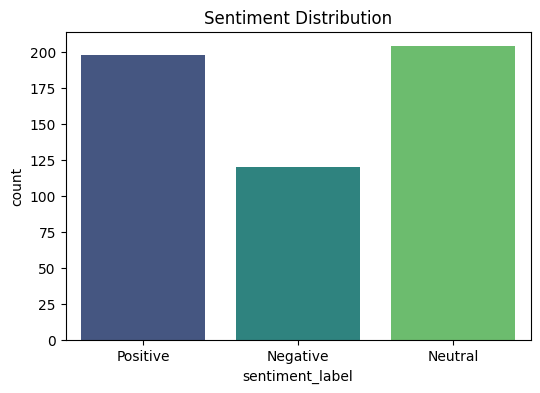

/tmp/ipython-input-5-2528020787.py:36: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


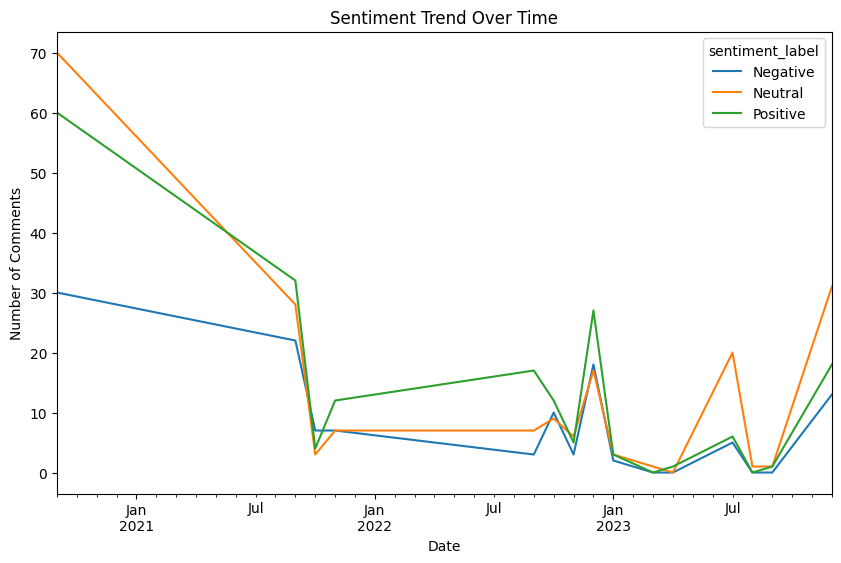

In [ ]:
# Import necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

# Apply sentiment analysis on cleaned text
df['sentiment_score'] = df['clean_text'].apply(get_sentiment)

# Classify into Positive, Neutral, Negative
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

# Show few results
print(df[['text', 'clean_text', 'sentiment_score', 'sentiment_label']].head())

# Sentiment distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title("Sentiment Distribution")
plt.show()

# Sentiment over time
df['year_month'] = df['date'].dt.to_period('M')
sentiment_over_time = df.groupby(['year_month', 'sentiment_label']).size().unstack().fillna(0)

sentiment_over_time.plot(figsize=(10,6))
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.show()


In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import nltk

# Tokenize cleaned text
df['tokens'] = df['clean_text'].apply(nltk.word_tokenize)

# Build Dictionary
dictionary = corpora.Dictionary(df['tokens'])

# Create Corpus
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# LDA Model Training
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=5,   # you can change topic number
                     random_state=42,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Display topics
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")


Topic 0: 0.016*"earth" + 0.013*"change" + 0.013*"climate" + 0.013*"co" + 0.007*"would" + 0.006*"people" + 0.006*"data" + 0.006*"warming" + 0.006*"atmosphere" + 0.006*"temperature"
Topic 1: 0.008*"year" + 0.007*"climate" + 0.007*"temperature" + 0.007*"earth" + 0.007*"planet" + 0.007*"energy" + 0.006*"people" + 0.006*"one" + 0.006*"know" + 0.005*"change"
Topic 2: 0.015*"climate" + 0.012*"change" + 0.012*"global" + 0.009*"de" + 0.007*"warming" + 0.006*"planet" + 0.006*"ice" + 0.006*"ano" + 0.006*"age" + 0.005*"nasa"
Topic 3: 0.015*"change" + 0.015*"climate" + 0.010*"nasa" + 0.006*"warming" + 0.006*"one" + 0.005*"earth" + 0.005*"say" + 0.004*"think" + 0.004*"u" + 0.004*"year"
Topic 4: 0.020*"year" + 0.013*"carbon" + 0.012*"foot" + 0.011*"water" + 0.011*"sea" + 0.011*"level" + 0.011*"dioxide" + 0.010*"atmosphere" + 0.010*"rise" + 0.009*"ton"


In [ ]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.6 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare visualization
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Save to HTML file
pyLDAvis.save_html(lda_vis, 'lda_topics.html')

print("Visualization saved successfully as lda_topics.html")


Visualization saved successfully as lda_topics.html
